# Tracts and Patchs

<img align="left" src = ../figs/logos/logo-IJCLab_v1.png height=40, style="padding: 10px"> 
<b>Tracts and patchs </b> <br>
Last verified to run on 2022-09-04 with LSST Science Pipelines release w_2022_22 <br>
Contact authors: Sylvie Dagoret-Campagne (DP0 Delegate) <br>
Target audience: DP0 delegates member <br>

## import packages

In [1]:
# general python packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize


from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# LSST packages
from lsst.daf.butler import Butler
import lsst.geom as geom

# allow interactive plots
#%matplotlib widget
%matplotlib inline

# default plot style is accessible
plt.style.use('tableau-colorblind10')

## Butler

In [2]:
config = 'dp02'
collections = '2.2i/runs/DP0.2'
butler = Butler(config, collections=collections)
registry=butler.registry

In [3]:
# Kill the kernel
#spearmanr(X,Y)

In [4]:
skymap = butler.get('skyMap')

927962


NameError: name 'matplotlib' is not defined

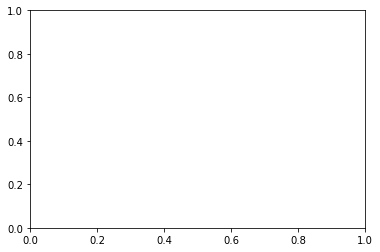

In [5]:
numTracts=0
patches = []
for tractInfo in skymap:
    tractID = tractInfo.getId()
    for patch in tractInfo:
        numTracts+=1
        ibb=patch.getInnerBBox()
        tWCS=tractInfo.getWcs()
        corners = []
        for corner in ibb.getCorners():
            p = geom.Point2D(corner.getX(), corner.getY())
            coord = tWCS.pixelToSky(p)
            corners.append([coord.getRa().asDegrees(), coord.getDec().asDegrees()])
            #print(corners)
            polygon = Polygon(corners,True)
            patches.append(polygon)
print(numTracts)        

(-47.0, -25.0)

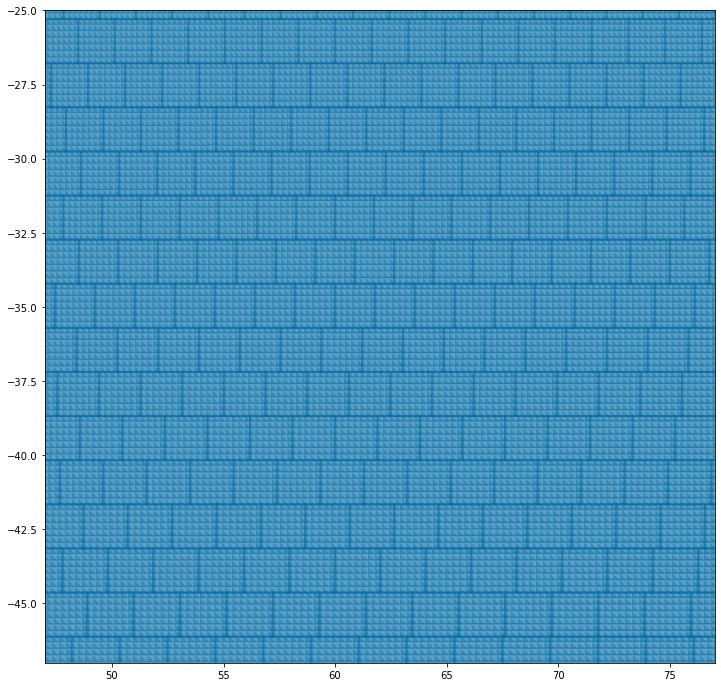

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
p = PatchCollection(patches, cmap=mpl.cm.jet, alpha=0.4)
ax.add_collection(p)  
plt.xlim([47, 77])
plt.ylim([-47, -25])